In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import os

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando os dados
df = pd.read_parquet('versao_1_spotify_songs.parquet')# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head().to_string(index=False))

Primeiras linhas do DataFrame:
      track_artist  track_popularity         track_album_id                             track_album_name track_album_release_date                                                                                      playlist_name            playlist_id playlist_genre  playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms    intervalo
       Ray Charles                59 0cw6Sv7IwZ87aLPPvNPSd0 Ray Charles (aka: Hallelujah, I Love Her So)               01/01/1957 The 1950s/1960s/1970s/1980s/1990s/2000s/2010s with pop/r&b/soul/boogie/dance/jazz/hip hop/hop/rap. 1S7BckuYIkEazeNKOSM0uA            r&b urban contemporary         0.565   0.962    8    -2.981     1       0.0640        0.4370            0.0000    0.0560    0.906 148.808       160227 [1957, 1962)
   The Temptations                26 7C4vMPQR8KcbZv4e2ZI0lc                  The Temptations Sing Smokey           

In [3]:
#Excluindo valores nulos
df = df.dropna()
df.isnull().sum()

track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
intervalo                   0
dtype: int64

In [4]:
#Excluindo valores duplicados
df = df.drop_duplicates()

In [5]:
# Lista das colunas a serem removidas
colunas_para_dropar = [
    'track_artist', 'track_album_id', 'track_album_name',
    'playlist_name', 'playlist_id', 'intervalo'
]

# Remover as colunas do conjunto de dados
df = df.drop(columns=colunas_para_dropar)


In [6]:
df['track_album_release_date']

track_name
Mess Around                                01/01/1957
My Girl                                    01/01/1965
One Bourbon, One Scotch, One Beer          01/01/1966
Gimme Shelter - Mono                       01/01/1966
Paint It, Black - Mono                     01/01/1966
                                              ...    
Lit                                        31/12/2019
No Sleep (feat. Bonn) - DubVision Remix    31/12/2019
memories of her, last winter               31/12/2019
Warrior                                    31/12/2019
Tottenham Tugz                             31/12/2019
Name: track_album_release_date, Length: 30942, dtype: object

In [7]:
# Aplicar o filtro para manter apenas os anos maiores que 2018
df = df[df['track_album_release_date'].str[-4:].astype(int) > 2018]

In [8]:
# Lista das colunas a serem removidas
colunas_para_dropar = ['track_album_release_date']

# Remover as colunas do conjunto de dados
df = df.drop(columns=colunas_para_dropar)

In [9]:
# Calculando a correlação entre as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

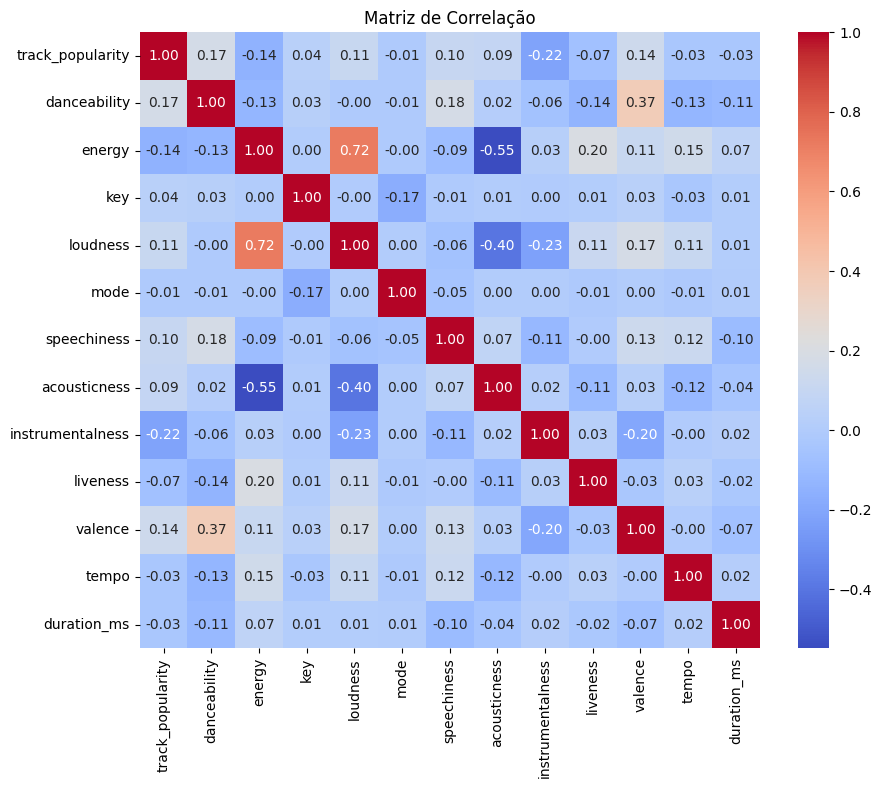

In [10]:
# Exibindo a matriz de correlação em um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [11]:
# Analisando a média de popularidade por gênero e subgênero de playlists
relevant_columns = ['track_popularity', 'playlist_genre', 'playlist_subgenre']
df_relevant = df[relevant_columns]

In [12]:
# Calculando a média da popularidade para cada combinação de gênero e subgênero
popularity_mean = df_relevant.groupby(['playlist_genre', 'playlist_subgenre']).mean().reset_index()

In [13]:
# Mostrando as médias de popularidade por combinação de gênero e subgênero
print("Média de Popularidade por Gênero e Subgênero de Playlists:")
print(popularity_mean)

Média de Popularidade por Gênero e Subgênero de Playlists:
   playlist_genre          playlist_subgenre  track_popularity
0             edm                   big room         37.350217
1             edm              electro house         41.522885
2             edm                    pop edm         52.890601
3             edm  progressive electro house         39.981982
4           latin              latin hip hop         67.722527
5           latin                  latin pop         57.562102
6           latin                  reggaeton         64.125592
7           latin                   tropical         44.691275
8             pop                  dance pop         53.051748
9             pop                 electropop         44.629310
10            pop            indie poptimism         50.555556
11            pop              post-teen pop         66.628253
12            r&b                    hip pop         58.586325
13            r&b                   neo soul         44.268

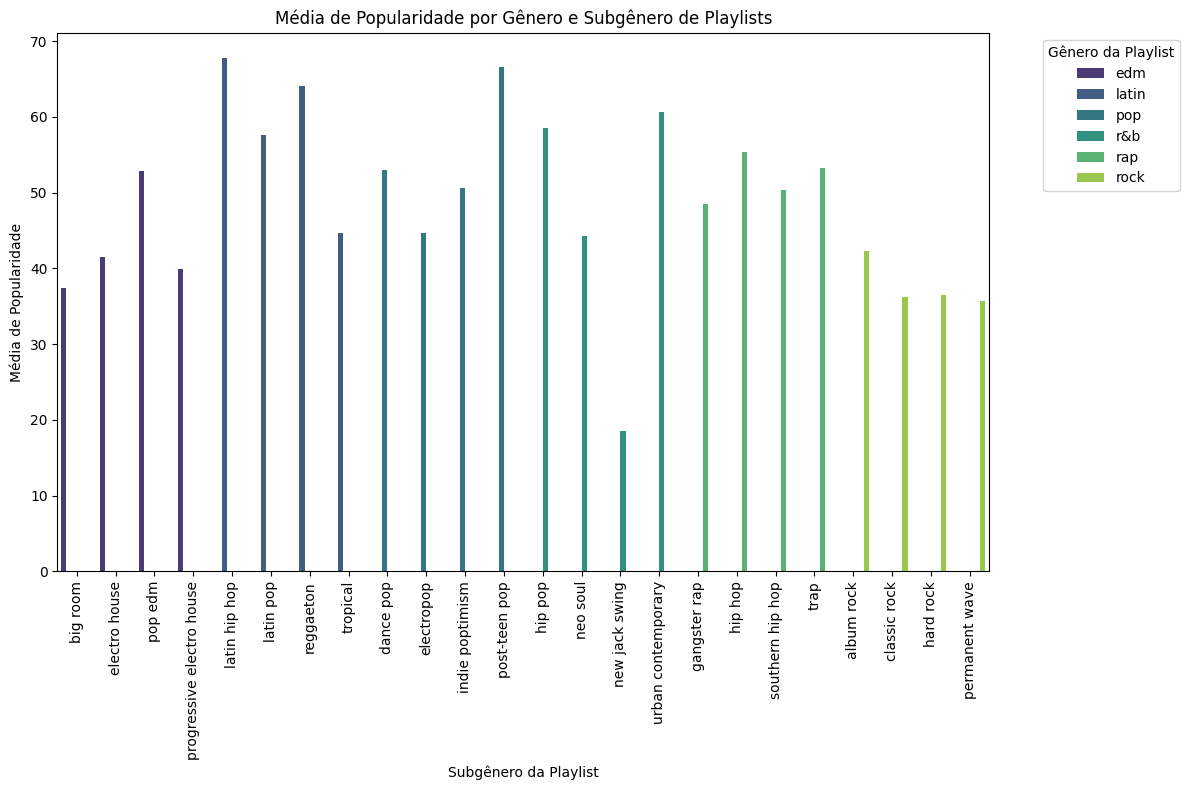

In [14]:
# Visualização da média de popularidade por gênero e subgênero de playlists
plt.figure(figsize=(12, 8))
sns.barplot(data=popularity_mean, x='playlist_subgenre', y='track_popularity', hue='playlist_genre', palette='viridis')
plt.title('Média de Popularidade por Gênero e Subgênero de Playlists')
plt.xlabel('Subgênero da Playlist')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=90)
plt.legend(title='Gênero da Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Calculando a média da popularidade para cada combinação de gênero e subgênero
popularity_median = df_relevant.groupby(['playlist_genre', 'playlist_subgenre']).median().reset_index()

In [16]:
# Mostrando as médias de popularidade por combinação de gênero e subgênero
print("Média de Popularidade por Gênero e Subgênero de Playlists:")
print(popularity_mean)

Média de Popularidade por Gênero e Subgênero de Playlists:
   playlist_genre          playlist_subgenre  track_popularity
0             edm                   big room         37.350217
1             edm              electro house         41.522885
2             edm                    pop edm         52.890601
3             edm  progressive electro house         39.981982
4           latin              latin hip hop         67.722527
5           latin                  latin pop         57.562102
6           latin                  reggaeton         64.125592
7           latin                   tropical         44.691275
8             pop                  dance pop         53.051748
9             pop                 electropop         44.629310
10            pop            indie poptimism         50.555556
11            pop              post-teen pop         66.628253
12            r&b                    hip pop         58.586325
13            r&b                   neo soul         44.268

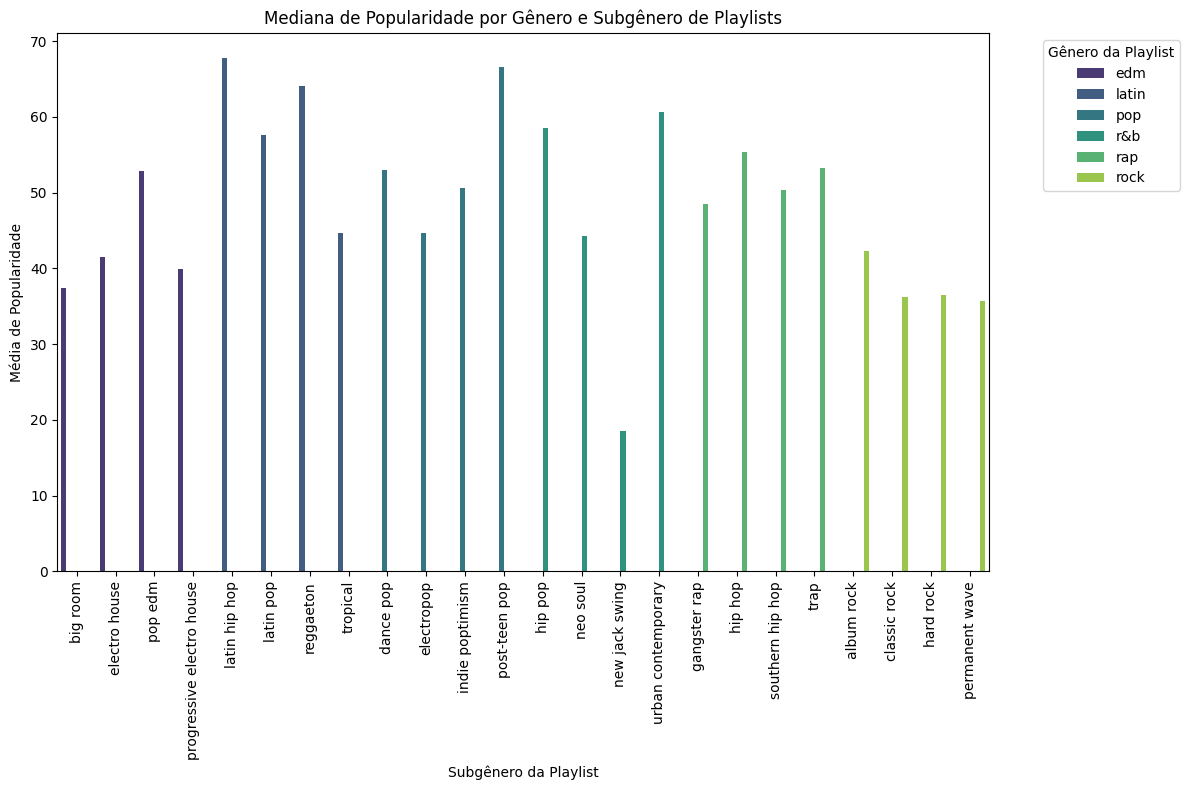

In [17]:
# Visualização da média de popularidade por gênero e subgênero de playlists
plt.figure(figsize=(12, 8))
sns.barplot(data=popularity_mean, x='playlist_subgenre', y='track_popularity', hue='playlist_genre', palette='viridis')
plt.title('Mediana de Popularidade por Gênero e Subgênero de Playlists')
plt.xlabel('Subgênero da Playlist')
plt.ylabel('Média de Popularidade')
plt.xticks(rotation=90)
plt.legend(title='Gênero da Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
df

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,,,
Midnight Drivn,7,pop,electropop,0.665,0.600,11,-7.396,0,0.0344,0.0103,0.455000,0.0928,0.595,102.002,247920
Save You,48,rap,trap,0.620,0.590,5,-8.289,0,0.0497,0.3420,0.000000,0.0958,0.270,160.026,192000
LeBron,2,rap,trap,0.703,0.376,6,-17.772,0,0.0752,0.2780,0.000000,0.0540,0.650,140.015,213618
Song 31,4,rap,hip hop,0.583,0.527,11,-7.876,1,0.0733,0.7150,0.000007,0.1540,0.395,97.346,187036
Toda - Real Hasta La Muerte Remix,0,rap,trap,0.594,0.393,5,-10.027,0,0.0809,0.2220,0.000002,0.0941,0.425,106.821,303073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lit,14,r&b,hip pop,0.785,0.368,3,-8.926,0,0.0975,0.0970,0.000000,0.1550,0.563,115.042,234005
No Sleep (feat. Bonn) - DubVision Remix,69,edm,electro house,0.584,0.790,11,-6.128,1,0.0589,0.0455,0.000000,0.2130,0.291,127.972,239062
"memories of her, last winter",53,rap,hip hop,0.669,0.245,0,-13.548,0,0.0438,0.8130,0.903000,0.0835,0.394,109.488,115135


In [19]:
nome_arquivo = 'versao_2_spotify_songs.csv'
# Criando a versão 1
df.to_csv(nome_arquivo, index=False)
df = pd.read_csv(nome_arquivo,encoding='utf-8', sep = ',',index_col=0)


In [22]:
# Carregando os dados
df = pd.read_csv('versao_2_spotify_songs.csv')# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head().to_string(index=False))

Primeiras linhas do DataFrame:
 track_popularity playlist_genre playlist_subgenre  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence   tempo  duration_ms
                7            pop        electropop         0.665   0.600   11    -7.396     0       0.0344        0.0103          0.455000    0.0928    0.595 102.002       247920
               48            rap              trap         0.620   0.590    5    -8.289     0       0.0497        0.3420          0.000000    0.0958    0.270 160.026       192000
                2            rap              trap         0.703   0.376    6   -17.772     0       0.0752        0.2780          0.000000    0.0540    0.650 140.015       213618
                4            rap           hip hop         0.583   0.527   11    -7.876     1       0.0733        0.7150          0.000007    0.1540    0.395  97.346       187036
                0            rap              trap         0.594   0.393  

In [23]:
# Converting 'track_popularity' to categorical labels
def classify_popularity(popularity):
    if popularity <= 20:
        return 0
    elif popularity <= 40:
        return 1
    elif popularity <= 60:
        return 2
    else:
        return 3

df['popularity_class'] = df['track_popularity'].apply(classify_popularity)

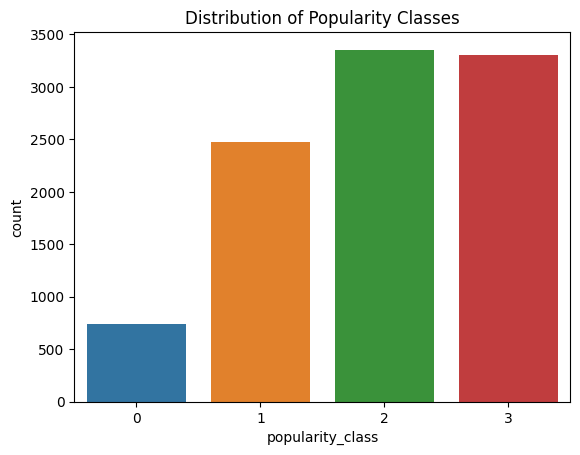

In [24]:
# Distribution of popularity classes
sns.countplot(x='popularity_class', data=df)
plt.title('Distribution of Popularity Classes')
plt.show()

In [25]:
# Informações gerais sobre o conjunto de dados
print("\nInformações gerais sobre o conjunto de dados:")
info_table = pd.DataFrame({
    'Nome da coluna': df.columns,
    'Tipos de dados': df.dtypes,
    'Valores não nulos': df.notnull().sum(),
    'Valores únicos': df.nunique()
})
print(info_table.to_string(index=False))


Informações gerais sobre o conjunto de dados:
   Nome da coluna Tipos de dados  Valores não nulos  Valores únicos
 track_popularity          int64               9864             101
   playlist_genre         object               9864               6
playlist_subgenre         object               9864              24
     danceability        float64               9864             706
           energy        float64               9864             845
              key          int64               9864              12
         loudness        float64               9864            5293
             mode          int64               9864               2
      speechiness        float64               9864            1146
     acousticness        float64               9864            2609
 instrumentalness        float64               9864            2802
         liveness        float64               9864            1221
          valence        float64               9864            1103
 